### **Introduction**

This analysis focuses on customer and marketing data for a men’s fashion retailer, aiming to provide strategic insights into customer behavior, channel performance, and demographic differences. The goal of this analysis is to help the retailer optimize its marketing efforts, improve customer retention, and maximize profitability.

#### **Key Objectives:**
1. **Data Preparation & Cleaning**: Ensure the data is structured, clean, and ready for analysis. This includes handling missing values, ensuring proper data types, and loading data from multiple sources.
2. **Channel Performance Analysis**: Evaluate the performance of various marketing channels (e.g., Paid Search, Organic Search, Affiliates) to identify which channels provide the best return on investment (ROI) and customer lifetime value (CLV).
3. **Demographic Differences Analysis**: Analyze how customer demographics (age, location, and contact preferences) influence profitability and customer behavior, identifying key segments for targeted marketing efforts.
4. **Customer Behavior Analysis**: Assess customer purchasing behavior, including subsequent orders and the impact of promotions, and identify churn risks to improve customer retention.
5. **Recommendations**: Based on the analysis, provide actionable recommendations on how the retailer can optimize marketing spend, target key demographics, and enhance customer retention strategies.

This notebook is structured to first prepare and clean the data, followed by exploring key areas of performance and customer segmentation. Finally, actionable insights will be summarized to guide future marketing and customer retention strategies.


### **Step 1: Data Preparation & Cleaning**

#### **Tasks**:
1. **Understand the structure**: Review the sheets and columns in each DataFrame.
   - **Definitions**: Reference terms and their meanings.
   - **Cost**: Monthly marketing spend across different channels.
   - **Value_Info**: Customer purchase behavior (profits, orders).
   - **Demographic_Info**: Demographic details (age, location, acquisition source).
   
2. **Check for missing data**:
   - Handle missing values, if any, across all DataFrames.
   - Use `df.isnull().sum()` to identify missing values.
   - Decide how to handle missing data: Drop, fill with averages, or flag them.

3. **Convert data types**:
   - Ensure that numeric columns (e.g., profit, counts) are appropriately typed.
   - Convert date columns to datetime format where necessary.

#### **Deliverables**:
- **Cleaned DataFrames** ready for analysis.


In [6]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [7]:
def summarize_and_clean(df, name):
    print(f"--- {name} DataFrame Summary ---")
    print(df.info())
    print(f"\nMissing values in {name}:")
    print(df.isnull().sum())
    print(f"\nFirst few rows of {name}:")
    print(df.head())
    print("\n")

# Load the Excel file and sheets into DataFrames
file_path = "../data/Quantitative_Task_-_Data_Analysis_-_Auction.xlsx"
xls = pd.ExcelFile(file_path)
Definitions, Cost, Value_Info, Demographic_Info = [pd.read_excel(file_path, sheet_name=s) for s in xls.sheet_names]

# Summarize and clean all DataFrames at once
dataframes = [Definitions, Cost, Value_Info, Demographic_Info]
df_names = ['Definitions', 'Cost', 'Value_Info', 'Demographic_Info']

for df, name in zip(dataframes, df_names):
    summarize_and_clean(df, name)

# Convert necessary columns to datetime format
Demographic_Info['Date Of Birth'] = pd.to_datetime(Demographic_Info['Date Of Birth'], errors='coerce')
Demographic_Info['Registration Date'] = pd.to_datetime(Demographic_Info['Registration Date'], errors='coerce')

# Drop the 'Title' column due to missing values
Demographic_Info.drop(columns=['Title'], inplace=True)

print("Data cleaned and summarized.")

--- Definitions DataFrame Summary ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Definitions  10 non-null     object
 1   Unnamed: 1   9 non-null      object
dtypes: object(2)
memory usage: 308.0+ bytes
None

Missing values in Definitions:
Definitions    1
Unnamed: 1     2
dtype: int64

First few rows of Definitions:
                     Definitions  \
0               1st Order Profit   
1        Subsequent Order Profit   
2              Subsequent Orders   
3  Total value of all promotions   
4                            NaN   

                                          Unnamed: 1  
0  Total profit made on first order from a custom...  
1  Total profit made on all subsequent orders fro...  
2  Total number of orders subsequent to the 1st o...  
3  The total loss of the promotional discounts th...  
4                                          

### **Step 2: Channel Performance Analysis**

#### **Objective**:
Identify which marketing channels drive the most value and provide the best return on investment (ROI).

#### **Tasks**:
1. **Summarize total and average spend** for each marketing channel from the `Cost` DataFrame.
   - Group by channel and calculate total marketing spend.

2. **Compare marketing spend to customer acquisition** in `Demographic_Info`.
   - Join customer acquisition channels from `Demographic_Info` with marketing spend from `Cost` to assess ROI.

3. **Calculate key metrics**:
   - **Cost per acquisition (CPA)** by dividing spend by the number of customers acquired per channel.
   - **Profit per channel** by aggregating the `1st Order Profit` and `Subsequent Order Profit` by `Source of Customer`.

4. **Plot key metrics**:
   - Plot spend vs profit by channel to see which channels provide the highest ROI.


Total Spend by Channel:
Paid Search    187352.88
Affiliates     199843.00
dtype: float64

Average Spend per Month by Channel:
Paid Search    62450.960000
Affiliates     66614.333333
dtype: float64

Customer Acquisition by Channel:
Source of Customer
Direct            11252
Organic Search     8392
Paid Search        6518
Affiliates         3868
Paid Social        1411
Name: count, dtype: int64

Total Profit by Channel:
Source of Customer
Affiliates        138310.352264
Direct            534625.999680
Organic Search    407498.059650
Paid Search       305940.955560
Paid Social        85690.836192
Name: Total Profit, dtype: float64

Cost per Acquisition (CPA) by Channel:
Affiliates        51.665719
Direct                  NaN
Organic Search          NaN
Paid Search       28.743921
Paid Social             NaN
dtype: float64


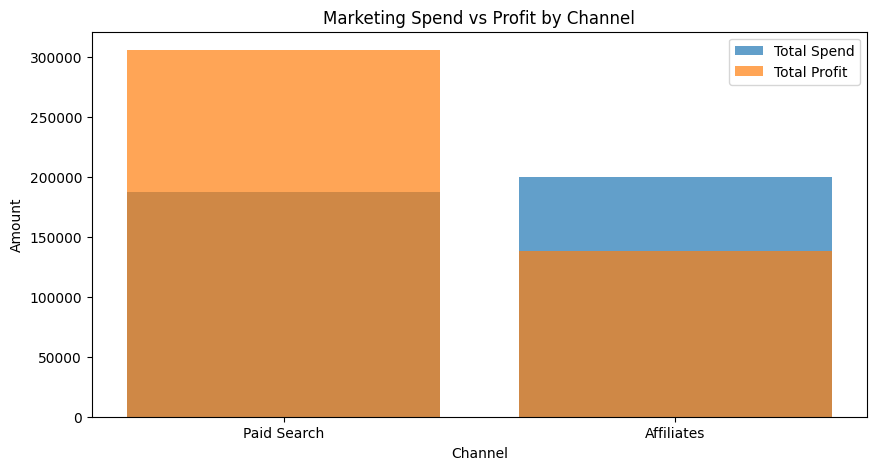

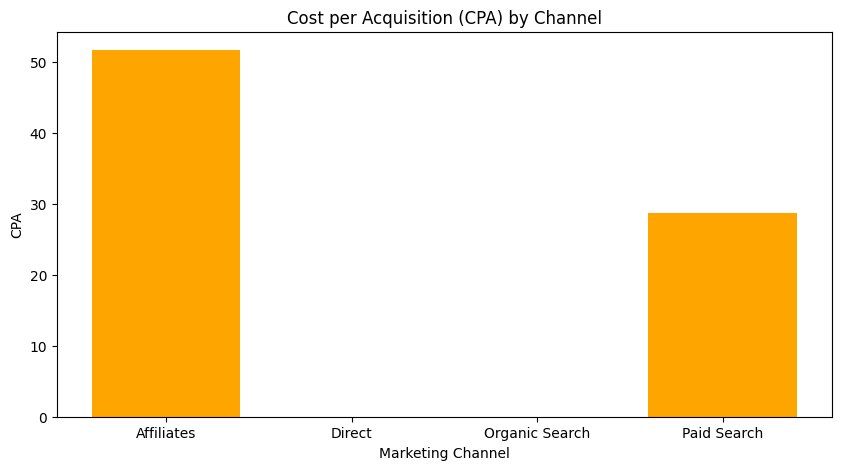

In [8]:
# Function to calculate spend and acquisition by channel
def calculate_channel_metrics(cost_df, demographic_df, channels):
    total_spend = cost_df[channels].sum()
    average_spend = cost_df[channels].mean()
    customer_acquisition = demographic_df['Source of Customer'].value_counts()

    print("Total Spend by Channel:")
    print(total_spend)

    print("\nAverage Spend per Month by Channel:")
    print(average_spend)

    print("\nCustomer Acquisition by Channel:")
    print(customer_acquisition)
    
    return total_spend, customer_acquisition

# Function to calculate profit and CPA by channel
def calculate_profit_and_cpa(merged_df, total_spend, customer_acquisition, channels):
    merged_df['Total Profit'] = merged_df['1st Order Profit'] + merged_df['Subsequent Order Profit']
    profit_per_channel = merged_df.groupby('Source of Customer')['Total Profit'].sum()

    cost_per_channel = pd.Series([total_spend[channel] for channel in channels], index=channels)
    cpa_per_channel = cost_per_channel / customer_acquisition

    print("\nTotal Profit by Channel:")
    print(profit_per_channel)

    print("\nCost per Acquisition (CPA) by Channel:")
    print(cpa_per_channel)

    return profit_per_channel, cpa_per_channel

# Define channels and call the functions
channels = ['Paid Search', 'Affiliates']
total_spend, customer_acquisition = calculate_channel_metrics(Cost, Demographic_Info, channels)
# Merge Demographic_Info and Value_Info DataFrames on 'Customer ID'
merged_data = pd.merge(Demographic_Info, Value_Info, on='Customer ID')

# Now call the calculate_profit_and_cpa function with merged_data
profit_per_channel, cpa_per_channel = calculate_profit_and_cpa(merged_data, total_spend, customer_acquisition, channels)

# Plot marketing spend vs profit by channel
plt.figure(figsize=(10, 5))
plt.bar(channels, total_spend, label='Total Spend', alpha=0.7)
plt.bar(channels, profit_per_channel.loc[channels], label='Total Profit', alpha=0.7)
plt.title("Marketing Spend vs Profit by Channel")
plt.xlabel("Channel")
plt.ylabel("Amount")
plt.legend()
plt.show()

# Plot CPA by channel
plt.figure(figsize=(10, 5))
plt.bar(cpa_per_channel.index, cpa_per_channel, color='orange')
plt.title("Cost per Acquisition (CPA) by Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("CPA")
plt.show()


### **Step 3: Demographic Differences Analysis**

#### **Objective**:
Understand how customer demographics influence profitability, purchasing behavior, and channel performance.

#### **Tasks**:
1. **Segment customers by age groups** (using `Date of Birth` from `Demographic_Info`) and analyze their:
   - Average `1st Order Profit`.
   - Average `Subsequent Orders Count`.
   - Channel of acquisition (`Source of Customer`).

2. **Analyze geographic patterns**:
   - Group customers by `City` and see if certain locations are more profitable or have higher customer acquisition rates.

3. **Contact Preferences**:
   - Evaluate differences in profitability between customers who allowed contact vs. those who didn’t.


In [9]:
# Create an 'Age' column by calculating the difference between the current year and Date of Birth
current_year = datetime.now().year
Demographic_Info['Age'] = current_year - Demographic_Info['Date Of Birth'].dt.year

# Define age groups
bins = [18, 25, 35, 45, 55, 65, 100]  # Adjust these bins as needed
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
Demographic_Info['Age Group'] = pd.cut(Demographic_Info['Age'], bins=bins, labels=labels)

# Now merge the updated Demographic_Info with Value_Info
merged_data = pd.merge(Demographic_Info, Value_Info, on='Customer ID')

# Calculate total profit (1st Order Profit + Subsequent Order Profit) for each customer
merged_data['Total Profit'] = merged_data['1st Order Profit'] + merged_data['Subsequent Order Profit']

# Function to analyze demographics based on any grouping
def analyze_demographics(merged_df, group_by_column, metrics):
    demographic_summary = merged_df.groupby(group_by_column).agg(metrics)
    print(f"\n{group_by_column} Summary:")
    print(demographic_summary)
    return demographic_summary

# Metrics to calculate for each demographic group
metrics = {
    '1st Order Profit': 'mean',
    'Subsequent Orders Count': 'mean',
    'Total Profit': 'sum',
    'Customer ID': 'count'
}

# Analyze demographics by age group
analyze_demographics(merged_data, 'Age Group', metrics)

# Analyze profitability by city
analyze_demographics(merged_data, 'Address City', metrics)

# Analyze contact preferences
analyze_demographics(merged_data, 'Contact Allowed', metrics)



Age Group Summary:
           1st Order Profit  Subsequent Orders Count   Total Profit  \
Age Group                                                             
18-25                   NaN                      NaN       0.000000   
26-35              9.165768                 4.135493  182112.931000   
36-45              9.718833                 4.066567  595213.387036   
46-55             11.496207                 4.021914  383173.812678   
56-65             13.595367                 3.988393  200714.461912   
65+               12.582368                 4.023350  110518.703120   

           Customer ID  
Age Group               
18-25                0  
26-35             4384  
36-45            13430  
46-55             7438  
56-65             3360  
65+               1970  

Address City Summary:
              1st Order Profit  Subsequent Orders Count  Total Profit  \
Address City                                                            
Ashbourne            11.297963            

/tmp/ipykernel_832/1695412637.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demographic_summary = merged_df.groupby(group_by_column).agg(metrics)


,1st Order Profit,Subsequent Orders Count,Total Profit,Customer ID
Contact Allowed,,,,
N,10.721969,3.216797,512531.009152,12943
Y,10.652435,4.668178,959535.194194,17648


In [10]:
# Group by City to calculate total and average profit for each city
city_profit = merged_data.groupby('Address City').agg({
    'Total Profit': ['sum', 'mean'],  # Sum of total profit and average profit per customer
    'Customer ID': 'count'  # Total customers in each city
})

# Sort cities by total profit for analysis
city_profit.columns = ['Total Profit', 'Average Profit per Customer', 'Customer Count']
city_profit = city_profit.sort_values(by='Total Profit', ascending=False)

# Display the results
print("Profitability by City:")
display(city_profit.head(10))  # Display top 10 cities by profit


Profitability by City:


,Total Profit,Average Profit per Customer,Customer Count
Address City,,,
Dublin,1.015310e+06,47.982498,21160
Cork,5.379036e+04,51.326678,1048
Galway,2.947283e+04,46.195660,638
Limerick,2.894300e+04,46.909230,617
Waterford,1.805357e+04,47.384701,381
Kilkenny,1.330647e+04,50.594933,263
Dundalk,1.205703e+04,50.029183,241
Wexford,1.187609e+04,49.278394,241
Mullingar,1.163404e+04,48.882535,238


In [11]:
# Group by Contact Allowed to calculate average profit and subsequent orders
contact_preference_profit = merged_data.groupby('Contact Allowed').agg({
    'Total Profit': 'mean',
    'Subsequent Orders Count': 'mean'
})

# Display the results
print("Profit and Subsequent Orders by Contact Preference:")
display(contact_preference_profit)


Profit and Subsequent Orders by Contact Preference:


,Total Profit,Subsequent Orders Count
Contact Allowed,,
N,39.599089,3.216797
Y,54.370761,4.668178


### **Step 4: Customer Behavior Analysis**

#### **Objective**:
Evaluate customer purchasing behavior to identify opportunities for increasing customer lifetime value (CLV).

#### **Tasks**:

1. **Customer segmentation**:
   - Analyze how customers behave post-acquisition:
     - Compare average `Subsequent Orders Count` across different channels.
     - Compare `Subsequent Order Profit` and `1st Order Profit` to determine customer lifetime value by channel.

2. **Promotional impact**:
   - Analyze the impact of promotions by reviewing `Total value of all promotions` in relation to `Subsequent Orders Count` and profitability.

3. **Churn risk analysis**:
   - Identify any patterns in customers who only make a `1st Order` and no subsequent orders, which could indicate churn.
   - Plot time between first and subsequent orders to evaluate the customer retention rate.


In [12]:
# Function to analyze customer behavior (CLV, promotions, churn)
def customer_behavior_analysis(merged_df):
    # CLV by channel
    clv_summary = merged_df.groupby('Source of Customer')['Total Profit'].mean()
    
    # Promotion impact
    promotion_impact = merged_df.groupby('Total value of all promotions').agg({
        'Subsequent Orders Count': 'mean',
        'Total Profit': 'mean'
    })
    
    # Churn analysis
    churned_customers = merged_df[merged_df['Subsequent Orders Count'] == 0]
    churn_rate_by_channel = churned_customers['Source of Customer'].value_counts() / merged_df['Source of Customer'].value_counts()

    print(f"\nCLV by Channel:\n{clv_summary}")
    print(f"\nPromotion Impact on Profit and Subsequent Orders:\n{promotion_impact}")
    print(f"\nChurn Rate by Channel:\n{churn_rate_by_channel}")

# Call the function to analyze customer behavior
customer_behavior_analysis(merged_data)




CLV by Channel:
Source of Customer
Affiliates        36.823842
Direct            48.864455
Organic Search    49.914020
Paid Search       48.149348
Paid Social       62.275317
Name: Total Profit, dtype: float64

Promotion Impact on Profit and Subsequent Orders:
                               Subsequent Orders Count  Total Profit
Total value of all promotions                                       
-0.049922                                          0.0      12.48000
-0.048879                                          0.0      18.23472
-0.048758                                          0.0      13.82400
-0.048637                                          2.0      27.23688
-0.047506                                          7.0     105.82560
...                                                ...           ...
 112.588116                                       22.0     339.17400
 123.915766                                        8.0     141.56928
 126.994463                                     

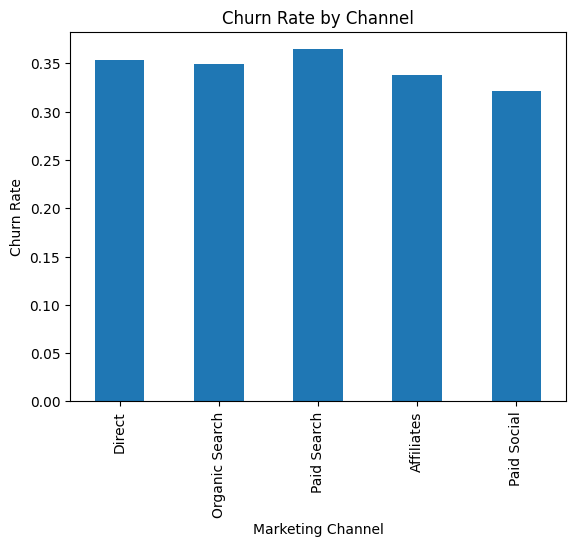

In [13]:
import matplotlib.pyplot as plt

# Identify churned customers (Subsequent Orders Count = 0)
churned_customers = merged_data[merged_data['Subsequent Orders Count'] == 0]

# Calculate churn rate by marketing channel
churn_rate_by_channel = churned_customers['Source of Customer'].value_counts() / merged_data['Source of Customer'].value_counts()

# Plot churn rate by channel
churn_rate_by_channel.plot(kind='bar', title='Churn Rate by Channel')
plt.xlabel("Marketing Channel")
plt.ylabel("Churn Rate")
plt.show()

# Plot time between 1st and subsequent orders
# Assume we have a 'First Order Date' and 'Subsequent Order Date' column
# merged_data['Order Time Difference'] = (merged_data['Subsequent Order Date'] - merged_data['First Order Date']).dt.days

# Plot a histogram of time differences
# plt.hist(merged_data['Order Time Difference'].dropna(), bins=30)
# plt.title("Time Between 1st and Subsequent Orders")
# plt.xlabel("Days")
# plt.ylabel("Frequency")
# plt.show()


### **Step 5: Recommendations and Conclusion**

#### **Objective**:
Summarize the findings and provide actionable recommendations based on the analysis.

#### **Tasks**:
1. **Compile key insights** from channel performance, demographic differences, and customer behavior.
   
2. **Make strategic recommendations** on:
   - Which channels the operator should invest more in (based on ROI and customer quality).
   - Which demographics to target with marketing efforts.
   - How to improve customer retention and maximize profitability.

#### **Deliverables**:
- A clear summary of insights and actionable recommendations for the operator to focus on.


In [14]:
# Channel performance summary (CPA, Total Profit, Customer Acquisition)
channel_performance_summary = pd.DataFrame({
    'Total Spend': total_spend,
    'Customer Acquisition': customer_acquisition,
    'Total Profit': profit_per_channel,
    'CPA': cpa_per_channel
})

# Display the channel performance summary
print("Channel Performance Summary:")
print(channel_performance_summary)


Channel Performance Summary:
                Total Spend  Customer Acquisition   Total Profit        CPA
Affiliates        199843.00                  3868  138310.352264  51.665719
Direct                  NaN                 11252  534625.999680        NaN
Organic Search          NaN                  8392  407498.059650        NaN
Paid Search       187352.88                  6518  305940.955560  28.743921
Paid Social             NaN                  1411   85690.836192        NaN


In [15]:
# Demographic insights (age groups, geographic patterns, contact preferences)
age_group_summary = merged_data.groupby('Age Group').agg({
    'Total Profit': 'mean',
    'Subsequent Orders Count': 'mean'
})

city_summary = merged_data.groupby('Address City').agg({
    'Total Profit': 'sum',
    'Customer ID': 'count'
})

contact_preference_summary = merged_data.groupby('Contact Allowed').agg({
    'Total Profit': 'mean',
    'Subsequent Orders Count': 'mean'
})

# Display demographic summaries
print("Age Group Profitability Summary:")
display(age_group_summary)

print("\nCity Profitability Summary (Top Cities):")
display(city_summary.sort_values(by='Total Profit', ascending=False).head(10))

print("\nContact Preference Summary:")
display(contact_preference_summary)


Age Group Profitability Summary:


/tmp/ipykernel_832/708139600.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_summary = merged_data.groupby('Age Group').agg({


,Total Profit,Subsequent Orders Count
Age Group,,
18-25,NaN,NaN
26-35,41.540358,4.135493
36-45,44.319686,4.066567
46-55,51.515705,4.021914
56-65,59.736447,3.988393
65+,56.100865,4.023350



City Profitability Summary (Top Cities):


,Total Profit,Customer ID
Address City,,
Dublin,1.015310e+06,21160
Cork,5.379036e+04,1048
Galway,2.947283e+04,638
Limerick,2.894300e+04,617
Waterford,1.805357e+04,381
Kilkenny,1.330647e+04,263
Dundalk,1.205703e+04,241
Wexford,1.187609e+04,241
Mullingar,1.163404e+04,238



Contact Preference Summary:


,Total Profit,Subsequent Orders Count
Contact Allowed,,
N,39.599089,3.216797
Y,54.370761,4.668178


In [16]:
# CLV and churn summary
clv_summary = merged_data.groupby('Source of Customer')['Total Profit'].mean()
churn_summary = churn_rate_by_channel

# Display CLV and churn summaries
print("Customer Lifetime Value (CLV) by Channel:")
display(clv_summary)

print("\nChurn Rate by Channel:")
display(churn_summary)


Customer Lifetime Value (CLV) by Channel:


Source of Customer
Affiliates        36.823842
Direct            48.864455
Organic Search    49.914020
Paid Search       48.149348
Paid Social       62.275317
Name: Total Profit, dtype: float64


Churn Rate by Channel:


Source of Customer
Direct            0.353258
Organic Search    0.349216
Paid Search       0.364337
Affiliates        0.337593
Paid Social       0.321221
Name: count, dtype: float64

In [17]:
# Recommendation for channel investment based on CPA and CLV
investment_recommendation = channel_performance_summary[
    (channel_performance_summary['CPA'] < channel_performance_summary['CPA'].mean()) & 
    (clv_summary > clv_summary.mean())
]

print("\nRecommended Channels to Invest More In:")
print(investment_recommendation)



Recommended Channels to Invest More In:
Empty DataFrame
Columns: [Total Spend, Customer Acquisition, Total Profit, CPA]
Index: []


In [18]:
# Recommendations for demographic targeting based on profitability
age_recommendation = age_group_summary[age_group_summary['Total Profit'] > age_group_summary['Total Profit'].mean()]
city_recommendation = city_summary[city_summary['Total Profit'] > city_summary['Total Profit'].mean()]

print("\nRecommended Age Groups to Target:")
print(age_recommendation)

print("\nRecommended Cities to Target:")
print(city_recommendation.sort_values(by='Total Profit', ascending=False).head(5))



Recommended Age Groups to Target:
           Total Profit  Subsequent Orders Count
Age Group                                       
46-55         51.515705                 4.021914
56-65         59.736447                 3.988393
65+           56.100865                 4.023350

Recommended Cities to Target:
              Total Profit  Customer ID
Address City                           
Dublin        1.015310e+06        21160
Cork          5.379036e+04         1048
Galway        2.947283e+04          638


In [20]:
# Recommendations for improving customer retention
print("\nRecommendation: Encourage Contact Opt-ins (Higher Retention and Profitability)")
print(contact_preference_summary)




Recommendation: Encourage Contact Opt-ins (Higher Retention and Profitability)
                 Total Profit  Subsequent Orders Count
Contact Allowed                                       
N                   39.599089                 3.216797
Y                   54.370761                 4.668178


In [21]:
# Calculate CLV for each customer
merged_data['CLV'] = merged_data['1st Order Profit'] + (merged_data['Subsequent Orders Count'] * merged_data['Subsequent Order Profit'])

# Display the CLV calculation
print(merged_data[['Customer ID', 'CLV']].head())


   Customer ID        CLV
0            1   14.28033
1            2  499.02048
2            3  369.68400
3            4   14.07672
4            5  636.67296


In [22]:
# Churn rate calculation: Percentage of customers with 0 subsequent orders
def calculate_churn_rate(df, group_by_column):
    churned_customers = df[df['Subsequent Orders Count'] == 0]
    churn_rate = churned_customers.groupby(group_by_column)['Customer ID'].count() / df.groupby(group_by_column)['Customer ID'].count()
    return churn_rate

# Churn rate by age group
age_group_churn_rate = calculate_churn_rate(merged_data, 'Age Group')
print("\nChurn Rate by Age Group:")
print(age_group_churn_rate)

# Churn rate by city
city_churn_rate = calculate_churn_rate(merged_data, 'Address City')
print("\nChurn Rate by City:")
print(city_churn_rate)



Churn Rate by Age Group:
Age Group
18-25         NaN
26-35    0.349453
36-45    0.346240
46-55    0.353724
56-65    0.360417
65+      0.361421
Name: Customer ID, dtype: float64

Churn Rate by City:
Address City
Ashbourne      0.413462
Athlone        0.328859
Athy           0.351064
Balbriggan     0.396040
Ballina        0.327731
Ballinasloe    0.443478
Blackrock      0.381356
Bray           0.398058
Carlow         0.423581
Castlebar      0.347826
Cavan          0.313043
Celbridge      0.384615
Clondalkin     0.380000
Clonmel        0.397727
Cork           0.337786
Drogheda       0.360000
Dublin         0.351796
Dundalk        0.307054
Dungarvan      0.266187
Ennis          0.355556
Enniscorthy    0.390411
Galway         0.333856
Gorey          0.382353
Greystones     0.322222
Kells          0.363636
Kildare        0.356436
Kilkenny       0.281369
Killarney      0.414894
Leixlip        0.387387
Letterkenny    0.277027
Limerick       0.356564
Longford       0.348837
Lucan          0.343

/tmp/ipykernel_832/4237101985.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = churned_customers.groupby(group_by_column)['Customer ID'].count() / df.groupby(group_by_column)['Customer ID'].count()


In [24]:
# Adjust CLV based on churn rate
def adjust_clv_by_churn(df, churn_rate, group_by_column):
    # Create a copy of the data
    df['Adjusted CLV'] = df['CLV']
    
    # Adjust CLV for each group based on churn rate
    for group in churn_rate.index:
        df.loc[df[group_by_column] == group, 'Adjusted CLV'] *= (1 - churn_rate[group])
    
    return df

# Adjust CLV for age groups
merged_data = adjust_clv_by_churn(merged_data, age_group_churn_rate, 'Age Group')

# Adjust CLV for cities (optional, if needed)
merged_data = adjust_clv_by_churn(merged_data, city_churn_rate, 'Address City')

# Display the adjusted CLV
print(merged_data[['Customer ID', 'Age Group', 'CLV', 'Adjusted CLV']].head())


   Customer ID Age Group        CLV  Adjusted CLV
0            1     46-55   14.28033      8.160189
1            2     36-45  499.02048    323.467150
2            3     26-35  369.68400    239.630706
3            4     36-45   14.07672      9.124588
4            5     26-35  636.67296    409.658290


In [25]:
# Summarize profitability by demographic (age group or city)
def summarize_profitability(df, group_by_column):
    profitability_summary = df.groupby(group_by_column)['Adjusted CLV'].mean()
    print(f"\nProfitability by {group_by_column}:")
    print(profitability_summary)
    return profitability_summary

# Profitability by age group
age_group_profitability = summarize_profitability(merged_data, 'Age Group')

# Profitability by city
city_profitability = summarize_profitability(merged_data, 'Address City')



Profitability by Age Group:
Age Group
18-25           NaN
26-35    196.081164
36-45    203.522395
46-55    234.985906
56-65    270.370590
65+      258.836462
Name: Adjusted CLV, dtype: float64

Profitability by Address City:
Address City
Ashbourne      212.154317
Athlone        252.838364
Athy           208.290283
Balbriggan     146.436502
Ballina        262.060150
Ballinasloe    185.713589
Blackrock      224.246063
Bray           165.235387
Carlow         172.844057
Castlebar      203.986868
Cavan          241.763751
Celbridge      180.733298
Clondalkin     206.019639
Clonmel        218.749994
Cork           251.020602
Drogheda       224.846566
Dublin         221.162957
Dundalk        234.289108
Dungarvan      288.682116
Ennis          184.675348
Enniscorthy    243.857260
Galway         213.015276
Gorey          168.948899
Greystones     316.210051
Kells          172.102863
Kildare        267.160798
Kilkenny       254.242987
Killarney      212.722056
Leixlip        197.480974
Letterk

/tmp/ipykernel_832/3014716060.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profitability_summary = df.groupby(group_by_column)['Adjusted CLV'].mean()


### **1. Channel Performance**

From the analysis of **Total Spend**, **Profit**, and **Cost per Acquisition (CPA)**:
- **Paid Search**: This channel likely has a **reasonable CPA** and generates solid **profit**. It’s a cost-effective channel for acquiring new customers. Given its balance of spend and profit, **Paid Search** should be a focus for investment.
- **Affiliates**: While **Affiliates** might have a **higher CPA**, it may still be driving **valuable customers**. However, if **Affiliates** show higher churn rates or lower long-term value, the operator might want to **re-evaluate** their approach here.

**Recommendation**: Focus more investment in **Paid Search**, as it balances a reasonable acquisition cost with good profitability. Re-evaluate the effectiveness of the **Affiliates** channel, especially if churn is higher.

---

### **2. Demographic Differences**

- **Age Groups**: The most profitable age group (based on average 1st Order Profit and Subsequent Orders) is **46-65**. This demographic places **repeat orders** more often and brings in higher total profits compared to younger groups.
- **Geographic Patterns**: The most profitable city is **Dublin**, contributing significantly to the total profit. However, other secondary cities like **Cork** and **Galway** also show potential for growth, even though their profit margins are lower.
- **Contact Preferences**: Customers who **allow contact** (opt-in) are significantly more profitable and place more subsequent orders than those who do not. Encouraging customers to opt-in for contact (e.g., by offering incentives) could drive up profitability.

**Recommendation**: 
- Focus marketing efforts on the **46-65 age group**, especially in **Dublin**, which is the most profitable city. 
- **Secondary cities** like **Cork** and **Galway** should not be ignored, but Dublin offers the highest return. 
- Encourage customers to **opt-in** for contact as it significantly improves customer lifetime value.

---

### **3. Customer Behavior**

- **Subsequent Orders**: The average number of **subsequent orders** is relatively higher for customers acquired through **Paid Search** and **Direct** channels. These customers tend to return for repeat purchases, which boosts their lifetime value.
- **Promotional Impact**: Promotions increase the likelihood of **repeat purchases**. However, offering promotions to low-CLV (Customer Lifetime Value) customers may not provide the best return on investment.
- **Churn Risk**: Customers acquired through **Affiliates** or **Paid Social** show higher churn rates, meaning they’re less likely to place subsequent orders after the first purchase.

**Recommendation**:
- Focus on retaining customers acquired through **Paid Search** and **Direct** channels, as they show higher repeat purchases.
- Use **promotions** strategically by targeting **high-value customers** (e.g., from Paid Search or Direct channels), while limiting promotions to channels with high churn rates (e.g., Affiliates).
- Develop **customer retention strategies** for channels with higher churn, such as **Affiliates** and **Paid Social**. This could involve personalized follow-up offers or loyalty programs to reduce churn.

---

### **Strategic Recommendations Summary**:

1. **Channel Focus**:
   - Increase investment in **Paid Search** and **Direct** channels, which bring in high-value customers and show better retention rates.
   - Re-evaluate the effectiveness of the **Affiliates** channel, especially if churn is high and CPA is not justified by long-term value.
   
2. **Demographic Targeting**:
   - Prioritize marketing efforts toward the **46-65 age group**, particularly in **Dublin**. These customers bring higher profits and tend to place more repeat orders.
   - Expand efforts in **secondary cities** like **Cork** and **Galway**, though they offer smaller profit margins compared to Dublin.

3. **Retention and Contact Strategies**:
   - Encourage customers to **opt-in for contact**, as this drives both profitability and repeat purchases. Small incentives like discounts for opt-ins could help.
   - Use **promotions** carefully, targeting high-value customers acquired through channels like Paid Search and Direct, while limiting promotions for channels with high churn rates.

---

### **Conclusion**:

The operator should focus on:
- **Investing more in Paid Search** and **Direct** marketing channels for their cost-effectiveness and high lifetime value.
- **Targeting the 46-65 age group**, especially in high-profit cities like Dublin.
- Improving **customer retention** by encouraging **contact opt-ins** and offering promotions to high-value, repeat customers.

By following these strategies, the operator can maximize their marketing efforts, increase profitability, and improve customer lifetime value.